In [10]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

# Chance #

### Probability Question 1

$P(\{Q, K\})$

- Solution with equally likely outcomes:

$$ \{A, Q\}, \{A, K\}, \{K, Q\}, \{K, A\}, \{Q, K\}, \{Q, A\}$$

$$\{A, Q\}, \{A, K\}, \{K, Q\}, \{K, A\}, \textbf{\{Q, K\}}, \{Q, A\}$$

so $P(\{Q, K\})$ = $\frac{1}{6}$

Another solution: $P(\{Q, K\})$ = $P(Q \text{ on first draw}) * P(K \text{ on second draw})$  = $\frac{1}{3} * \frac{1}{2} = \frac{1}{6}$

- This solution uses the **multplication rule**.

### Probability Question 2

- Solution with equally likely outcomes:

$$ \{A, Q\}, \{A, K\}, \{K, Q\}, \{K, A\}, \{Q, K\}, \{Q, A\}$$

$$\{A, Q\}, \{A, K\}, \textbf{\{K, Q\}}, \{K, A\}, \textbf{\{Q, K\}}, \{Q, A\}$$

The two bolded outcomes are distinct (they cannot happen at the same time). So we have that

$P(\text{ending up with } Q \text{ and } K)$ = $P(\{Q, K\})$ + $P(\{K, Q\})$ = $\frac{1}{6} + \frac{1}{6} = \frac{2}{6} = \frac{1}{3}$
- This solution uses the **addition rule**.

### Demo for Questions 1 and 2

In [11]:
cards = make_array('A', 'K', 'Q')

In [13]:
np.random.choice(cards, 2, replace=False)

array(['Q', 'K'],
      dtype='<U1')

In [ ]:
You could have also made an array of size six and drawn from this six times.

In [16]:
def three_card_game():
    two_cards_drawn = np.random.choice(cards, 2, replace=False)
    return [two_cards_drawn.item(0), two_cards_drawn.item(1)]

In [21]:
three_card_game()

['Q', 'K']

In [23]:
results = Table(['First Card', 'Second Card'])
results

First Card,Second Card


In [24]:
for i in np.arange(10000):
    results.append(three_card_game())

In [30]:
results_grouped = results.group(['First Card','Second Card'])

In [33]:
results_grouped = results_grouped.with_column('Proportion', 
                                              results_grouped.column('count')/sum(results_grouped.column('count')))
results_grouped

First Card,Second Card,count,Proportion
A,K,1638,0.1638
A,Q,1651,0.1651
K,A,1731,0.1731
K,Q,1630,0.163
Q,A,1696,0.1696
Q,K,1654,0.1654


This justifies our earlier calculations. The proportion of $\{Q, K\}$ is approximately \frac{1}{6}, and the combined proportion of either $\{Q, K\}$ or  $\{K, Q\}$ is $\frac{2}{6} = \frac{1}{3}$.

### Demo for The Monty Hall Problem ###

In [41]:
goats = make_array('first goat', 'second goat')
doors = make_array('car', 'first goat', 'second goat')
doors

array(['car', 'first goat', 'second goat'],
      dtype='<U11')

In [42]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [43]:
[other_goat('first goat'), other_goat('second goat')]

['second goat', 'first goat']

In [47]:
def monty_hall():
    """Return 
    [contestant's guess, what Monty reveals, 
    what remains behind the other door]"""
    
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_choice = 'car'
    
    if contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_choice = 'car'
    
    if contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_choice = other_goat(monty_choice)
        
    return [contestant_choice, monty_choice, remaining_choice]

In [48]:
monty_hall()

['car', 'second goat', 'first goat']

In [49]:
results = Table(["Contestant's Choice", "Monty's Choice", 'Remaining'])

for i in np.arange(10000):
    results.append(monty_hall())


In [50]:
results.show(3)

Contestant's Choice,Monty's Choice,Remaining
car,first goat,second goat
first goat,second goat,car
first goat,second goat,car


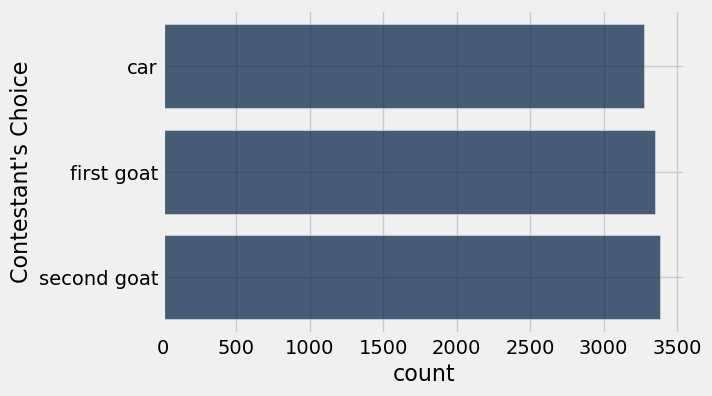

In [53]:
results.group("Contestant's Choice").barh("Contestant's Choice")

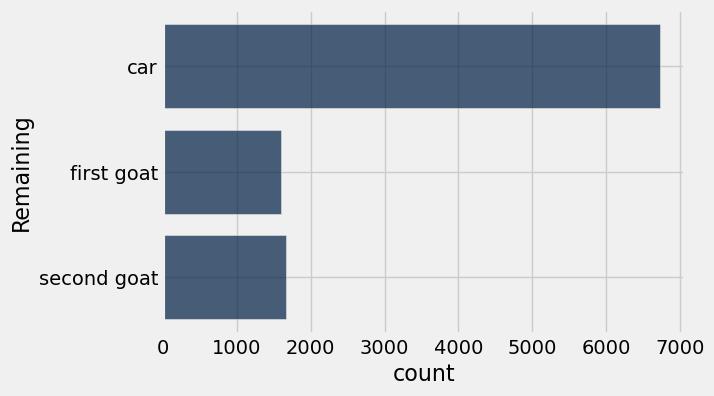

In [51]:
results.group('Remaining').barh('Remaining')